<a href="https://colab.research.google.com/github/KamilShape/customer_segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introducion**

Database: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [41]:
#visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#sklearn
from sklearn.cluster import KMeans

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
customers = pd.read_csv('/content/drive/MyDrive/customer_segmentation.csv')

In [44]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
#checking null values
np.sum(customers.isnull().any(axis=1))

0

In [46]:
#average annual income
print(f"Average annual income: {customers['Annual Income (k$)'].mean()*1000} $")

Average annual income: 60560.0 $


In [47]:
#min and max income
print(f"Minimal annual income: {customers['Annual Income (k$)'].min()*1000} $")
print(f"Maximal annual income: {customers['Annual Income (k$)'].max()*1000} $")

Minimal annual income: 15000 $
Maximal annual income: 137000 $


In [48]:
#min and max age
print(f"Min age: {customers['Age'].min()}")
print(f"Max age: {customers['Age'].max()}")

Min age: 18
Max age: 70


<Axes: ylabel='Gender'>

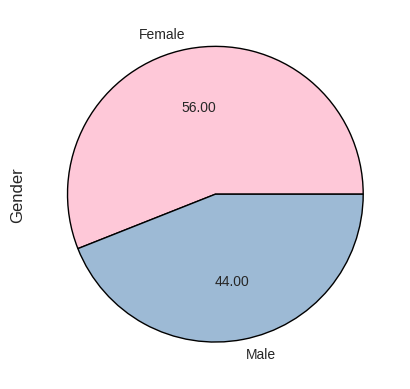

In [49]:
#customers gender
colors = ["#FEC8D8", "#9DBAD5"]
customers['Gender'].value_counts().plot.pie(autopct = '%.2f', colors = colors, wedgeprops = {"linewidth": 1, "edgecolor": "black"})

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

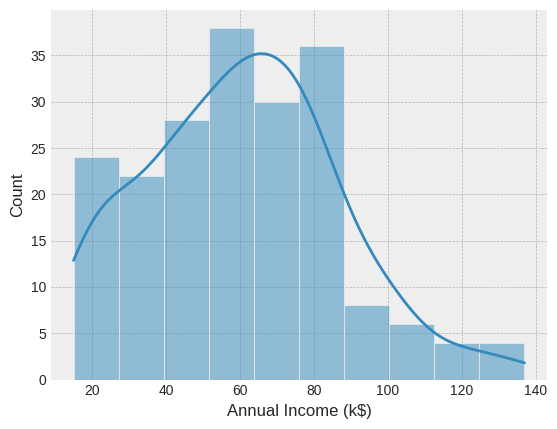

In [50]:
#histogram
sns.histplot(data=customers, x='Annual Income (k$)', kde=True)

In [51]:
#change gender to category
customers['Gender'] = customers['Gender'].astype('category')
customers['Gender'] = customers['Gender'].cat.codes

#**2. Data visualisation**

In [52]:
customers['Spending score range'] = pd.cut(customers['Spending Score (1-100)'], bins = [1,21,41,61,81,101], labels = ['1-20','21-40','41-60','61-80','81-100'])

In [53]:
customers['Annual income range'] = pd.cut(customers['Annual Income (k$)'], bins = [14,31,46,61,76,91,106,121,138], labels = ['15-30','31-45','46-60','61-75','76-90','91-105','106-120','> 120'])

<ipython-input-54-11e1326f1c2e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


Text(0.5, 0, 'Range')

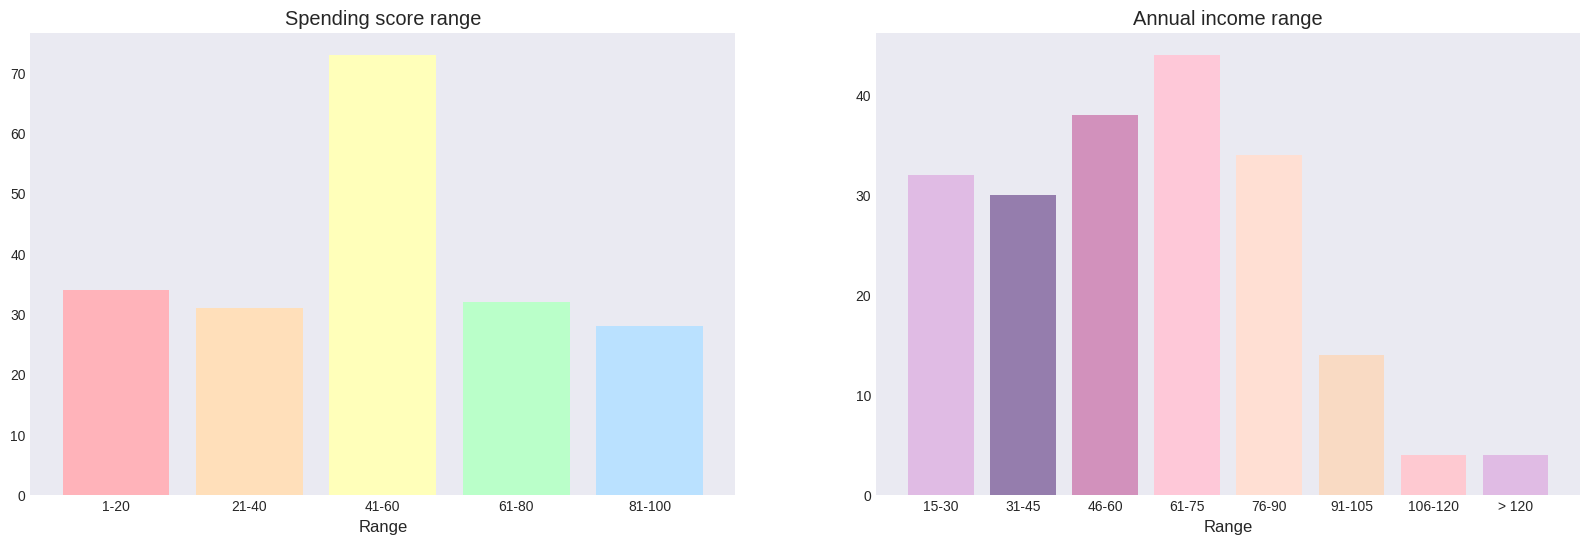

In [54]:
plt.style.use('seaborn-dark')
fig, ax = plt.subplots(1,2, figsize = (20,6))
color1 = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff' ]
color2 = ['#E0BBE4', '#957DAD','#D291BC','#FEC8D8','#FFDFD3','#F9DAC3','#FEC9D1']
score_range_count = pd.DataFrame(customers['Spending score range'].value_counts().reset_index().sort_values(by='index'))
income_range_count = pd.DataFrame(customers['Annual income range'].value_counts().reset_index().sort_values(by='index'))
ax[0].bar(score_range_count['index'], score_range_count['Spending score range'], color=color1)
ax[0].set_title('Spending score range')
ax[0].set_xlabel('Range')
ax[1].bar(income_range_count['index'], income_range_count['Annual income range'], color=color2)
ax[1].set_title('Annual income range')
ax[1].set_xlabel('Range')

#**3.Testnig algorithm**

In [55]:
x = customers.iloc[:,1:5]

In [56]:
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


<Axes: >

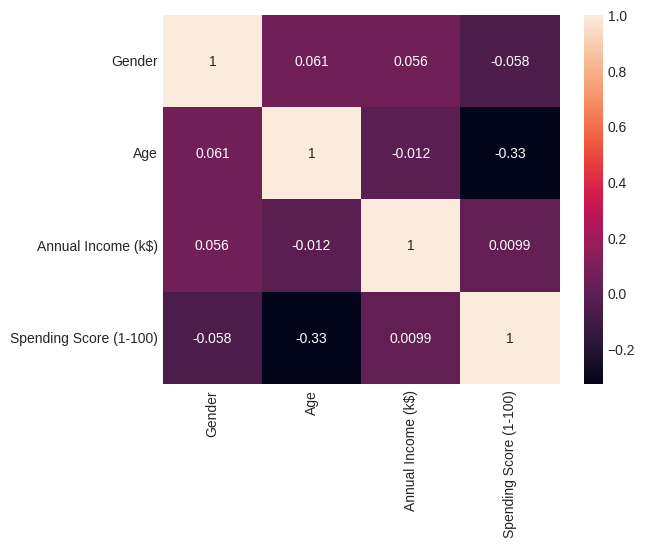

In [57]:
#heatmap
sns.heatmap(x.corr(), annot=True)

In [58]:
ks = [i for i in range(1,15)]
inertias=[]

for k in ks:
  k_means=KMeans(n_clusters=k)
  k_means.fit_predict(x)
  inertias.append(k_means.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

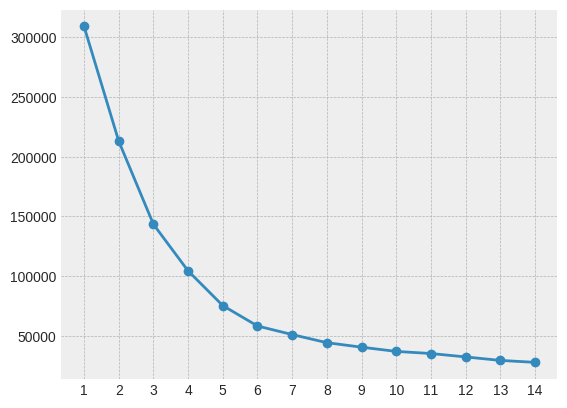

In [59]:
plt.style.use('bmh')
fig, ax = plt.subplots()
ax.plot(ks, inertias, '-o')
ax.set_xticks(ks)

##I decided to set 5 clusters.

# **4. K - Means**

In [60]:
k_means = KMeans(n_clusters=5, random_state=30)

In [61]:
k_means.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [62]:
customers['cluster'] = k_means.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [63]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending score range,Annual income range,cluster
0,1,1,19,15,39,21-40,15-30,4
1,2,1,21,15,81,61-80,15-30,0
2,3,0,20,16,6,1-20,15-30,4
3,4,0,23,16,77,61-80,15-30,0
4,5,0,31,17,40,21-40,15-30,4


In [64]:
#change cluster to category
customers['cluster'] = customers['cluster'].astype('category')
customers['cluster'] = customers['cluster'].cat.codes

In [65]:
#change Spending score range and	Annual income range to string
customers['Spending score range'] = customers['Spending score range'].astype('str')
customers['Annual income range'] = customers['Annual income range'].astype('str')

In [66]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    int8  
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Spending score range    200 non-null    object
 6   Annual income range     200 non-null    object
 7   cluster                 200 non-null    int8  
dtypes: int64(4), int8(2), object(2)
memory usage: 9.9+ KB


In [67]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending score range,Annual income range,cluster
0,1,1,19,15,39,21-40,15-30,4
1,2,1,21,15,81,61-80,15-30,0
2,3,0,20,16,6,1-20,15-30,4
3,4,0,23,16,77,61-80,15-30,0
4,5,0,31,17,40,21-40,15-30,4


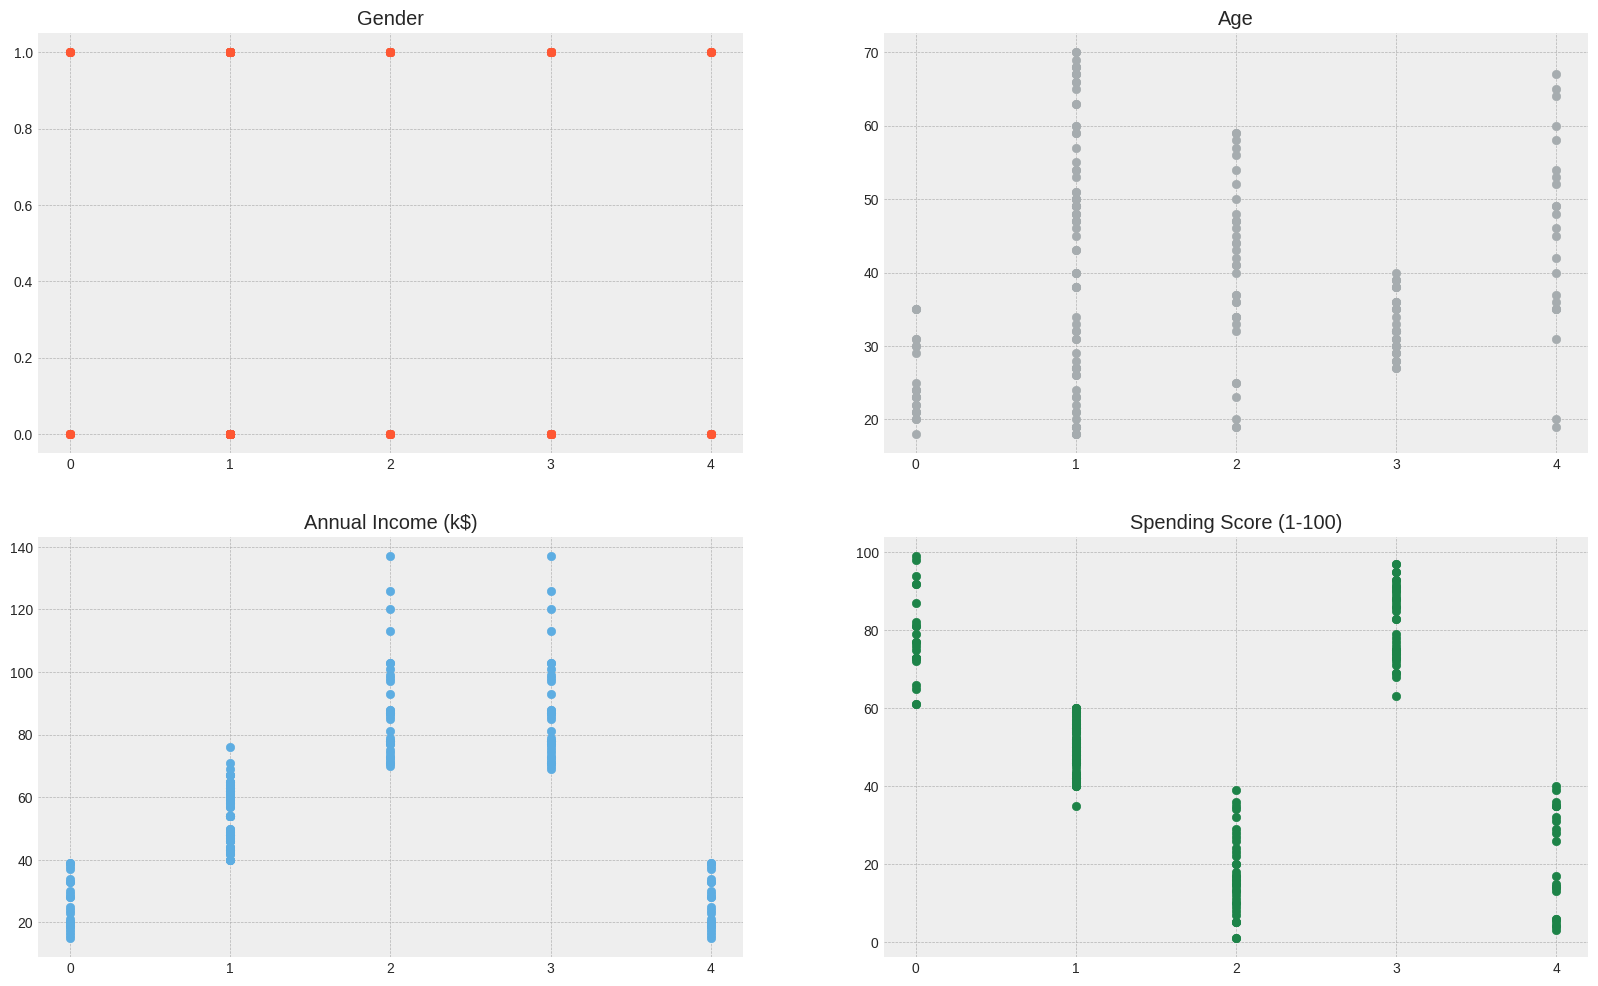

In [73]:
fig, ax = plt.subplots(2,2, figsize = (20,12))
ax[0,0].scatter(customers['cluster'], customers['Gender'], color='#FF5733')
ax[0,0].set_title('Gender')
ax[0,0].set_xticks(np.arange(0,5,1))
ax[0,1].scatter(customers['cluster'], customers['Age'], color='#A6ACAF')
ax[0,1].set_title('Age')
ax[0,1].set_xticks(np.arange(0,5,1))
ax[1,0].scatter(customers['cluster'], customers['Annual Income (k$)'], color='#5DADE2')
ax[1,0].set_title('Annual Income (k$)')
ax[1,0].set_xticks(np.arange(0,5,1))
ax[1,1].scatter(customers['cluster'], customers['Spending Score (1-100)'], color='#1D8348')
ax[1,1].set_title('Spending Score (1-100)')
ax[1,1].set_xticks(np.arange(0,5,1))
